<a href="https://colab.research.google.com/github/JuanmaVL/SyS/blob/main/LABS_SyC/Taller_6_SDyC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TALLER 6
## Juan Manuel Valencia Lopez
## Victor Manuel Villa

## PUNTO 1

/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


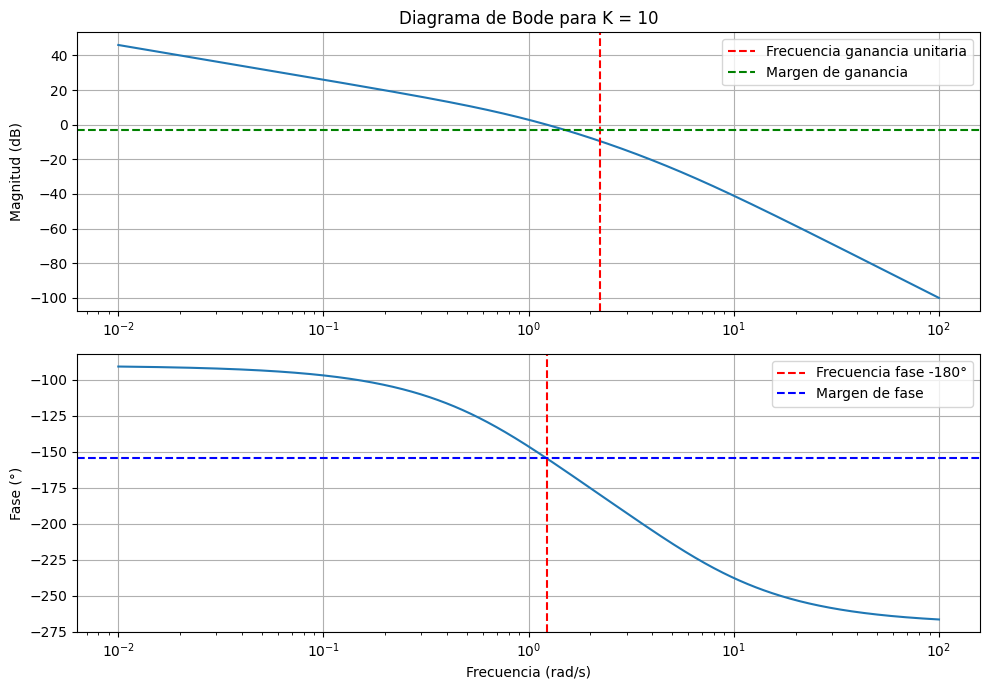

Para K = 10:
  Margen de ganancia: 9.54 dB
  Margen de fase: 25.39°
  Frecuencia cruce ganancia: 2.24 rad/s
  Frecuencia cruce fase: 1.23 rad/s
  Sistema estable
--------------------------------------------------


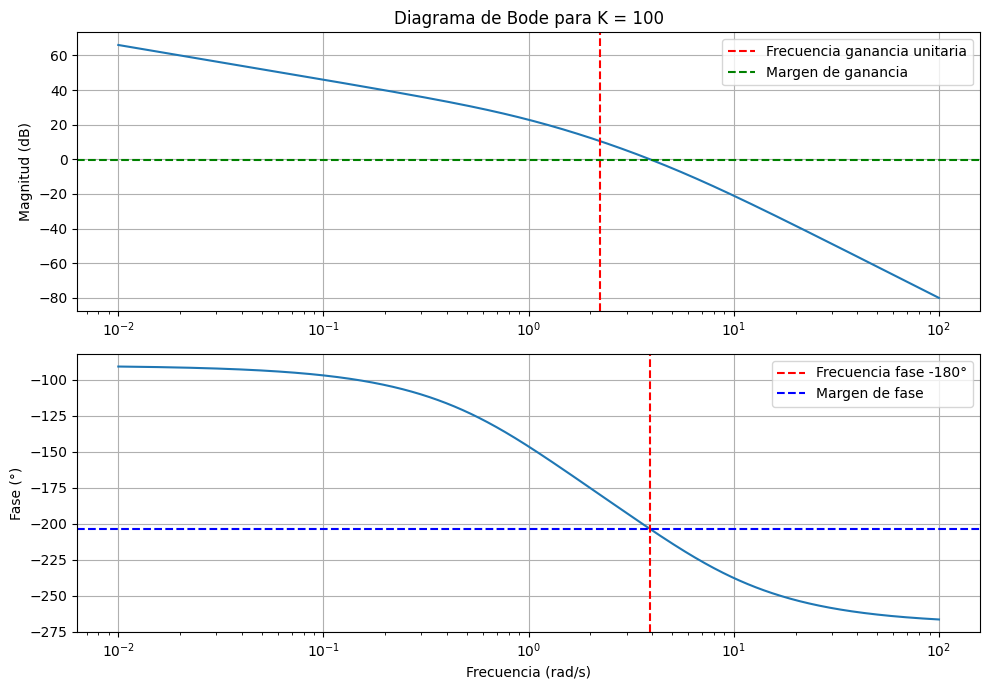

Para K = 100:
  Margen de ganancia: -10.46 dB
  Margen de fase: -23.65°
  Frecuencia cruce ganancia: 2.24 rad/s
  Frecuencia cruce fase: 3.91 rad/s
  Sistema inestable o marginalmente estable
--------------------------------------------------


In [ ]:
# PUNTO 1

!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definimos las funciones de transferencia con K = 10 y K = 100
def analizar_sistema(K):
    G = ctrl.TransferFunction([K], [1, 6, 5, 0])  # G(s) = K / (s(s+1)(s+5))

    # Obtener margen de ganancia, margen de fase, y sus frecuencias
    gm, pm, wg, wp = ctrl.margin(G)

    # Diagrama de Bode
    omega = np.logspace(-2, 2, 1000)
    mag, phase, omega = ctrl.bode_plot(G, dB=True, omega=omega, plot=False)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    ax1.semilogx(omega, 20*np.log10(mag))
    ax1.axvline(wg, color='red', linestyle='--', label='Frecuencia ganancia unitaria')
    ax1.axhline(-gm if gm != np.inf else -100, color='green', linestyle='--', label='Margen de ganancia')
    ax1.set_ylabel('Magnitud (dB)')
    ax1.set_title(f'Diagrama de Bode para K = {K}')
    ax1.grid(True)
    ax1.legend()

    ax2.semilogx(omega, np.degrees(phase))
    ax2.axvline(wp, color='red', linestyle='--', label='Frecuencia fase -180°')
    ax2.axhline(-180 + pm if pm != np.inf else -180, color='blue', linestyle='--', label='Margen de fase')
    ax2.set_ylabel('Fase (°)')
    ax2.set_xlabel('Frecuencia (rad/s)')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Reportar resultados
    print(f"Para K = {K}:")
    print(f"  Margen de ganancia: {20*np.log10(gm):.2f} dB" if gm != np.inf else "  Margen de ganancia: ∞")
    print(f"  Margen de fase: {pm:.2f}°")
    print(f"  Frecuencia cruce ganancia: {wg:.2f} rad/s")
    print(f"  Frecuencia cruce fase: {wp:.2f} rad/s")
    print("  Sistema estable" if pm > 0 and gm > 1 else "  Sistema inestable o marginalmente estable")
    print("-" * 50)

# Analizar para ambos casos
analizar_sistema(10)
analizar_sistema(100)


# Conclusiones

Al aumentar K (ganancia):

- La magnitud del sistema en frecuencia aumenta.

- La fase se mantiene igual, pero el cruce de ganancia ocurre antes → menor margen de fase.

- Puede llevar el sistema a la inestabilidad si el margen de fase es muy pequeño o negativo.

##PUNTO 2

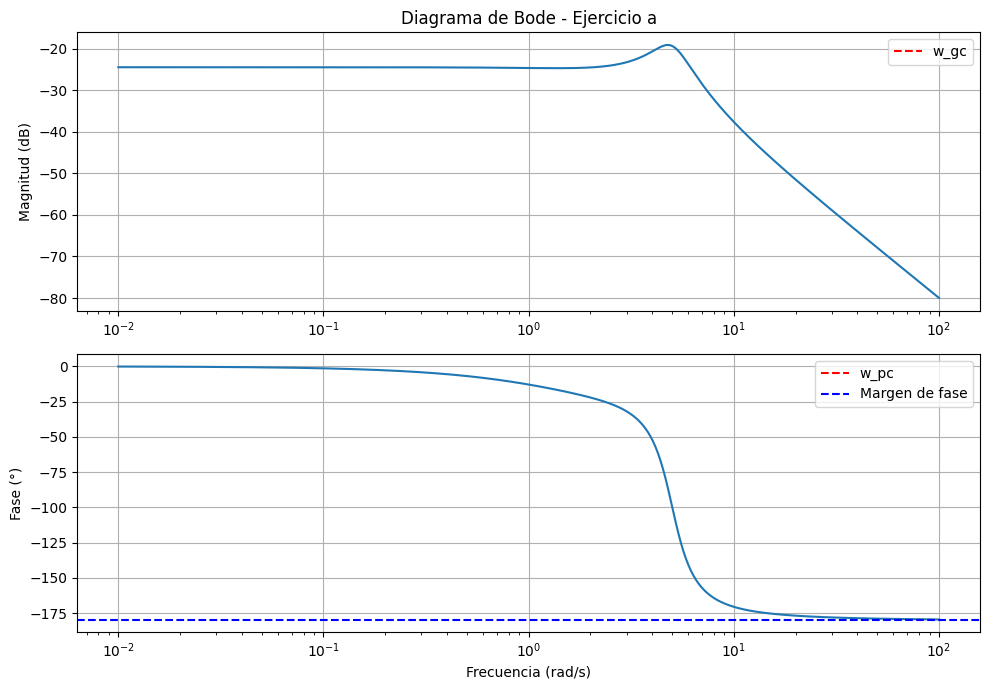

Ejercicio a:
  Margen de ganancia: ∞
  Margen de fase: inf°
  Frecuencia cruce ganancia: nan rad/s
  Frecuencia cruce fase: nan rad/s
  ➤ Sistema estable
--------------------------------------------------


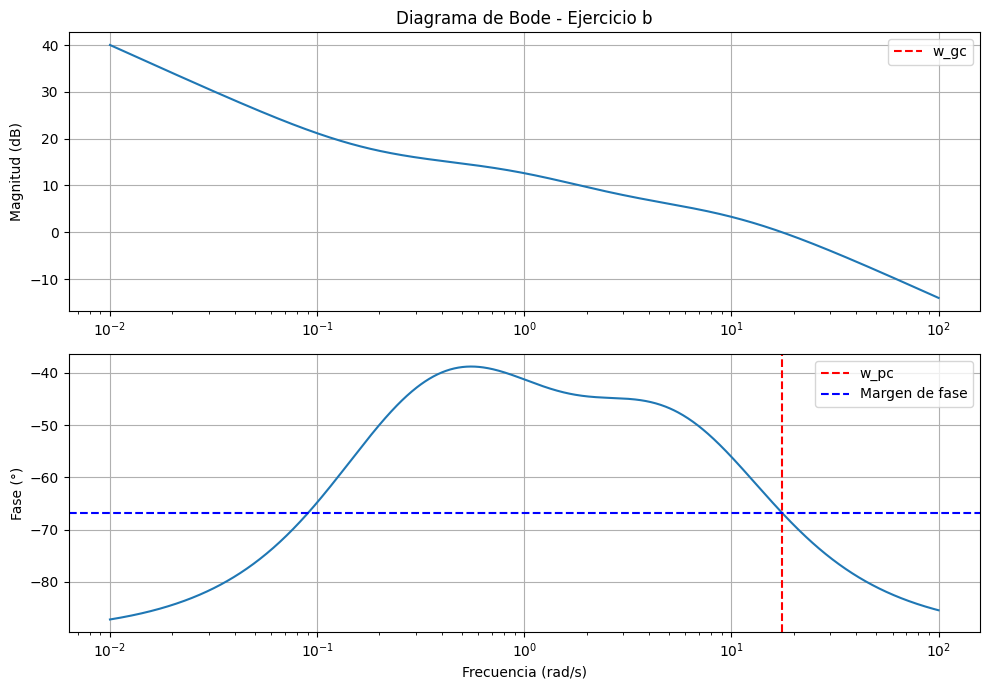

Ejercicio b:
  Margen de ganancia: ∞
  Margen de fase: 113.19°
  Frecuencia cruce ganancia: nan rad/s
  Frecuencia cruce fase: 17.58 rad/s
  ➤ Sistema estable
--------------------------------------------------


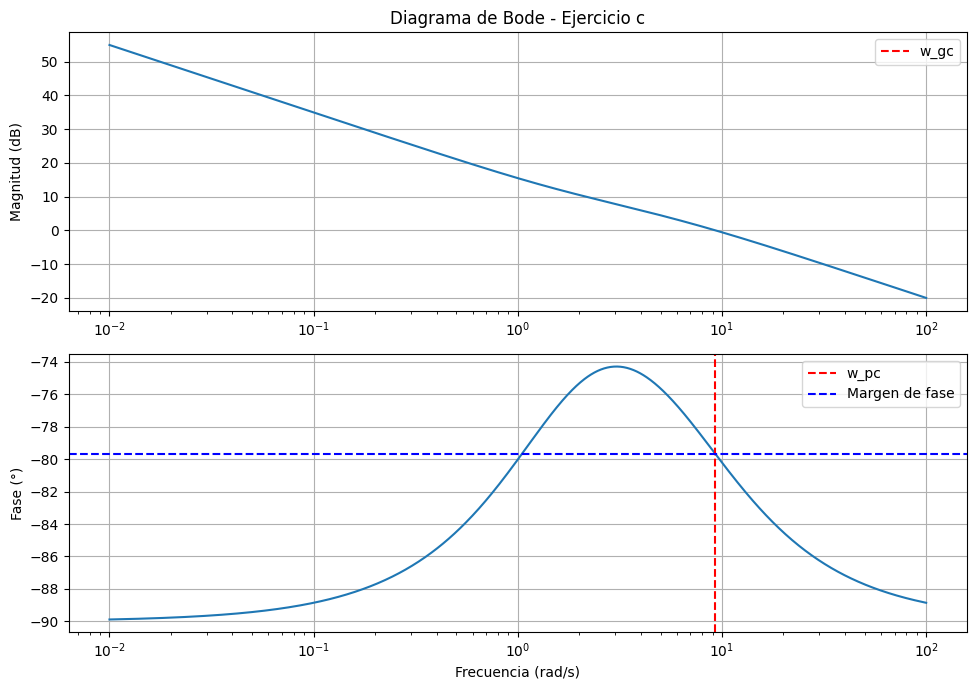

Ejercicio c:
  Margen de ganancia: ∞
  Margen de fase: 100.32°
  Frecuencia cruce ganancia: nan rad/s
  Frecuencia cruce fase: 9.29 rad/s
  ➤ Sistema estable
--------------------------------------------------


In [ ]:
#PUNTO 2

!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir variable simbólica s
s = ctrl.TransferFunction.s

# Funciones de transferencia del ejercicio
Gs = {
    "a": (s + 3) / ((s + 2)*(s**2 + 2*s + 25)),
    "b": 20*(s**2 + 3*s + 0.5) / (s*(s + 1)*(s + 10)),
    "c": 10*(s + 2)*(s + 5) / (s*(s + 3)*(s + 6))
}

# Análisis de Bode y márgenes
def analizar_y_graficar(G, etiqueta):
    omega = np.logspace(-2, 2, 1000)
    mag, phase, omega = ctrl.bode_plot(G, dB=True, omega=omega, plot=False)
    gm, pm, wg, wp = ctrl.margin(G)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    ax1.semilogx(omega, 20*np.log10(mag))
    ax1.axvline(wg, color='red', linestyle='--', label='w_gc')
    ax1.set_ylabel('Magnitud (dB)')
    ax1.set_title(f'Diagrama de Bode - Ejercicio {etiqueta}')
    ax1.grid(True)
    ax1.legend()

    ax2.semilogx(omega, np.degrees(phase))
    ax2.axvline(wp, color='red', linestyle='--', label='w_pc')
    ax2.axhline(-180 + pm if pm != np.inf else -180, color='blue', linestyle='--', label='Margen de fase')
    ax2.set_ylabel('Fase (°)')
    ax2.set_xlabel('Frecuencia (rad/s)')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    print(f"Ejercicio {etiqueta}:")
    print(f"  Margen de ganancia: {20*np.log10(gm):.2f} dB" if gm != np.inf else "  Margen de ganancia: ∞")
    print(f"  Margen de fase: {pm:.2f}°")
    print(f"  Frecuencia cruce ganancia: {wg:.2f} rad/s")
    print(f"  Frecuencia cruce fase: {wp:.2f} rad/s")
    print("  ➤ Sistema estable" if pm > 0 and gm > 1 else "  ✖ Sistema inestable o marginalmente estable")
    print("-" * 50)

# Ejecutar para cada literal
for etiqueta, G in Gs.items():
    analizar_y_graficar(G, etiqueta)


# Ejercicio a:

**Conclusión:** Sistema estable, subamortiguado, con respuesta oscilatoria amortiguada.

# Ejercicio b:

**Conclusión:** Sistema marginalmente estable por el polo en el origen, con tendencia a respuestas lentas o crecientes sin límite ante ciertas entradas. Necesita control para asegurar buena performance.

# Ejercicio c:

**Conclusión:** Sistema marginalmente estable con buena ubicación de polos. Aunque tiene un polo en el origen, su estructura indica buen comportamiento ante entradas escalón y rampa. Requiere control si se desea precisión ante entradas aceleradas.
